# Test algoritama na Housing setu podataka

### California Housing test podataka
Set podataka **california houses prices** sastoji se od $8$ značajki:

1. medianIncome *("MedInc")* - Prosječna zarada domaćinstava koja se nalaze u okolici (mjereno u 10k),

2. housingMedianAge *("HouseAge)* - Prosječna starost kuća koje se nalaze u okolici (niži broj novija zgrada),

3. averageRooms *("AveRooms")* - Prosječan broj soba u kućama koje se nalaze u okolici,

4. averageBedrooms *("AveBedrms")* - Prosječan broj spavaćih soba u kućama koje se nalaze u okolici,

5. population *("Population")* - Prosječan broj ljudi koji žive u okolici,

6. households *("AveOccup")* - Prosječan broj ljudi po domaćinstvu,

7. latitude *("Latitude")* - Mjera koja kaže koliko je sjeverno kuća,

8. longitude *("Longitude")* - Mjera koja kaže kolo je zapadno kuća.

Dakle temeljem ovih 8 značajki i cijene koliko pojedina kuća vrijedi, potrebno je kreirati takav model koji će predvidjeti cijenu neke nove kuće ako su za nju poznate prethodno navedene značajke. 

Više o podacima može se pronaći na poveznicama: [docs](https://www.kaggle.com/camnugent/california-housing-prices), [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).


## Klasa za testiranje algoritama: *model*

U svrhu lakšeg kreiranja neuronskih mreža i testiranja algoritama stvorena je klasa **model** koja služi kao svojevrsni API nad TensorFlow knjižicom. Cijela neuronska mreža zadaje se pomoću $9$ metoda:

1. *setLayersNeurons* - prima listu koja ima definiran broj neurona po sloju počevši s prvim skrivenim slojem. Primjerice neuronska mreža koja ima topologiju 500,200,200 i izlaz 1 zadala bi se pomoću *setLayersNeurons([500,200,200,1])*.<br><br>

2. *setActivations* - prima listu koja ima definirane aktivacijske funkcije. Primjerice ako želimo da prva dva sloja imaju Relu kao aktivacijsku funkciju, a zadnja dva da budu bez aktivacije, poziv metode je sljedeći: *setActivations(['relu','relu',None,None])* Implementirane aktivacijske funkcije jesu:
    
    * 'relu' - [Rectified Linear Unit](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).
    * 'elu'  - [Exponential linear unit](https://sefiks.com/2018/01/02/elu-as-a-neural-networks-activation-function/).
    * 'sig' - [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function).
    * 'tanh' - [Hyperbolic Tangent Activation Function](https://theclevermachine.wordpress.com/tag/tanh-function/).
    * None - Kada ne želimo imati aktivacijsku funkciju nad slojem.
<br><br>   
3. *setRugluarizations* - Metoda koja dodaje svakom sloju regularizaciju. Implementirane su dvije vrste regularizacije: *l1* i *l2* regularizacija. Uz svaku regularizaciju potrebno je dodati i regularizacijski parametar, stoga korištenje ove funkcije jest sljedeće: *setRegularization([['l2',0.001],['l2',0.001],['l1',0.01],None])* gdje se na prva dva sloja postavlja regularizacija *l2* s regularizacijskim parametrom $0.001$, na treći sloj se postavlja regularizacije *l1* s regularizacijskim parametrom $0.01$, dok četvrti sloj nema regularizacije.
<br><br>
4. *setBatchNormalization* - Metoda koja primjenjuje [Batch Normalization](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c) na slojeve, kao argument prima listu vrijednosti momentuma koji se koristi prilikom ažuriranja batch normalization matrice (*None* ukoliko nema normalizacije). Primjer pozivanja funkcije glasi: *setBatchNormalization([0.9, 0.9, 0.9, None])*
<br><br>
5. *setInitialisation* - Metoda koja postavlja inicijalne vrijednosti težina koje se treniraju. Implementirana je [He inicijalizacija](https://towardsdatascience.com/random-initialization-for-neural-networks-a-thing-of-the-past-bfcdd806bf9e). Korištenje jest vrlo jednostavno: *setInitialisation(['he_init','he_init','he_init',None])*. U slučaju kada se koristi *None*, težine su nasumično inicijalizirane.
<br><br>
6. *setLoss* - Metoda koja postavlja loss funkciju. Loss funkcija može biti: *softmax* ili *mse*, odnosno 
[softmax za klasifikaciju](https://deepnotes.io/softmax-crossentropy) ili [srednja kvadratna pogreška za regresiju](https://medium.freecodecamp.org/machine-learning-mean-squared-error-regression-line-c7dde9a26b93). Korištenje metode je sljedeće: *setLoss("softmax")* i *setLoss("mse")*.
<br><br>

7. *setOptimiser* - Metoda koja postavlja optimizator. Ugrađeni optimizatori su:

    * Adam - *setOptimiser(["adam", $\alpha$]=*
    * AdaGrad - *setOptimiser(["adaGrad", $\alpha$])*
    * Gradient Descent - *setOptimiser(["gradDes", $\alpha$])*
    * Momentum - *setOptimiser(["momentum", $\alpha$, $\beta$])*
    * RMSProp  - *setOptimiser(["rmsProp", $\alpha$, $\beta$])*
<br><br>

8. *setIoShape* - Metoda koja postavlja oblik ulaznih i izlaznih podataka kao i njihov tip. Za broj stupaca se tipično postavlja *None*. Metoda se poziva tako da se prvo navodi oblik ulaznog sloja, potom oblik izlaza, a zatim tipovi ulaznih i izlaznih podataka. Primjerice: *setIOshape((None,9),(None), tf.float32, tf.int32)* postavlja ulazni sloj koji će imati $9$ značajki tipa float, izlazni sloj će imati $1$ značajku i bit će tipa integer.
<br><br>

9. *setAlphaDecay* - Metoda omogućuje dodavanje raspada parametra $\alpha$. Poziva se na sljedeći način: *setAlphaDecay($\alpha_0$,$r$,$baza$)* (tipična baza je $1/10$).
<br><br>

10. *trainModel* - Metoda koja trenira model. Kao argumente prima redom: *ulazni parametri trening seta*, *izlaz trening seta*, *ulazni parametri validacijskog seta*, *izlaz validacijskog seta*, *broj epoha*, *veličina batch-a*, *early stopping kriterij* nakon kojeg se zaustavlja treniranje.

## Testirani modeli
Svi modeli su imali iste parametre:

1. Broj neurona i slojeva: 50, 50, 25, 10, 1,
2. Aktivacije: relu, relu, relu, relu, None,
3. Regularizacija: ['l2',0.001],['l2',0.001], ['l2',0.001],['l2',0.001],None,
4. BatchNormalization: 0.9, 0.9, 0.9, 0.9, 0.9
5. Inicijalizacija: He inicijalizacija, He inicijalizacija, He inicijalizacija, He inicijalizacija, He inicijalizacija
6. Loss funkcija: MSE
7. Ulazni sloj/izlazni sloj: 9 parametara tipa float/ 1 (vrijednost kuće) tipa float
8. Trenirali su se s uključenim early stop algoritmom na 10000 epoha s veličinom batch-a 200 i early stopping kriterijem nakon 25 nepromijenjenih najboljih rezultata.
9. Gradient descent i Momentum optimizator trenirali su se i sa AlphaDecay-om (parametri: 0.001,10000,1/10) 
10. Inicijalni $\alpha = 0.001$

Trening set se sastojao od $15480$ slika, a validacijski set od $5160$ slika.

In [ ]:
# Imports
import tensorflow as tf
import numpy as np
from functools import partial

class model:
    
    # Init variables
    def __init__(self):
        # Graph elements
        self.neurons = None
        self.activations = None
        self.regularization = None
        self.batchNormalisation = None
        self.initialisation = None
        self.loss = None
        self.optimiser = None
        self.decay = False
    
    # Set input/outputshape
    def setIOshape(self, inputShape, outputShape, itype = tf.float32, otype = tf.float32):
        self.inputShape = inputShape
        self.outputShape = outputShape
        self.itype= itype
        self.otype= otype
    
    # Add neurons
    def setLayersNeurons(self, neuronsPerLayer):
        self.neurons = neuronsPerLayer

    # Add activations
    def setActivations(self, activationsPerLayers):
        self.activations = activationsPerLayers
    
    # Add regularizations
    def setRegularizations(self, regularizationPerLayer):
        self.regularization = regularizationPerLayer
        
    # Add regularizations
    def setBatchNormalization(self, batchNormalizationPerLayer):
        self.batchNormalisation = batchNormalizationPerLayer
    
    # Add initialisations for weights
    def setInitialisation(self, initialisationPerLayer):
        self.initialisation = initialisationPerLayer
    
    # Set loss function
    def setLoss(self, loss):
        self.loss = loss
    
    # Set optimiser function
    def setOptimiser(self, opt):
        self.optimiser = opt
               
    # Set alphaDecay
    def setAlphaDecay(self, initAlpha, decay_steps, decay_rate):
        self.initial_learning_rate = initAlpha
        self.decay_steps = decay_steps
        self.decay_rate = decay_rate
        self.decay = True
        
    # Reset default graph
    def reset_graph(self, seed=42):
        tf.reset_default_graph()
        tf.set_random_seed(seed)
        np.random.seed(seed)
    
    # Batch shuffeling
    def shuffle_batch(self, X, y, batch_size):
        rnd_idx = np.random.permutation(len(X))
        n_batches = len(X) // batch_size
        for batch_idx in np.array_split(rnd_idx, n_batches):
            X_batch, y_batch = X[batch_idx], y[batch_idx]
            yield X_batch, y_batch

    # Train
    def trainModel(self, xTrain, yTrain, xValid, yValid, epochs, batch_size, earlyStopping = 0):
        # Building Graph
        # Check for neurons
        if (self.neurons == None):
            print("Error, no neurons added - use setLayersNeuorns method")
            return(0)
        
        elementsSum = len(self.neurons) + len(self.activations) + len(self.regularization) + len(self.batchNormalisation) + len(self.initialisation) 
        if (len(self.neurons) != elementsSum / 5):
            print("Error, invalid number of elements")
            return (0)
        
        # Reseting default graph
        self.reset_graph()
        
        # Create input/outputPlaceholders and training flag
        X = tf.placeholder(self.itype, shape = self.inputShape, name = 'X')
        y = tf.placeholder(self.otype, shape = self.outputShape, name = 'y')
        training = tf.placeholder_with_default(False, shape=(), name='training')
        
        
        # Prepare dicts
        # Initialisation
        for i, elem in enumerate(self.initialisation):
            if elem == "he_init":
                self.initialisation[i] = tf.variance_scaling_initializer()
            else:
                self.initialisation[i] = None
        
        # Regularization
        for i, elem in enumerate(self.regularization):
            if (elem == None or len(elem) != 2):
                continue
            if (elem[0] != "l1" or elem[0]!= "l2"):
                self.regularization[i] = None

            if (elem[0] == "l1"):
                self.regularization[i] = tf.contrib.layers.l1_regularizer(elem[1])
            
            if (elem[0] == "l2"):
                self.regularization[i] = tf.contrib.layers.l2_regularizer(elem[1])
        
        # Batch normalisation
        my_batch_norm_layer = partial(tf.layers.batch_normalization,training=training)
        
        # Activation function
        for i, elem in enumerate(self.activations):
            
            if elem == 'relu':
                self.activations[i] = partial(tf.nn.relu)
            if elem == 'elu':
                self.activations[i] = partial(tf.nn.elu)
            if elem == 'sig':
                self.activations[i] = partial(tf.nn.sigmoid)
            if elem == 'tanh':
                self.activations[i] = partial(tf.nn.tanh) 
            
            if (elem not in ['relu', 'elu', 'sig', 'tanh']):
                self.activations[i] = None
            
        # Build layers
        layers = [X]
        with tf.name_scope("dnn"):        
            
            for i, numberOfNeurons in enumerate(self.neurons):
                layer = tf.layers.dense(layers[i], self.neurons[i], kernel_initializer = self.initialisation[i]
                                       , kernel_regularizer = self.regularization[i], name = "hidden_"+str(i+1))
                if (self.activations[i] != None):
                    if self.batchNormalisation[i] != None:
                        layer = self.activations[i](my_batch_norm_layer(layer, momentum = self.batchNormalisation[i]))
                    else:
                        layer = self.activations[i](layer)
                else:
                    if self.batchNormalisation[i] != None:
                        layer = my_batch_norm_layer(layer, momentum = self.batchNormalisation[i])
                layers.append(layer)
        
        # Build loss
        with tf.name_scope("loss"):
            if self.loss == "softmax":
                base = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=layers[len(layers)-1])
            
            if self.loss == "mse":
                base = tf.reduce_mean(tf.square(layers[len(layers)-1] - y), name = "mse")

            base_loss = tf.reduce_mean(base, name = "base_loss")
            reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
            loss = tf.add_n([base_loss] + reg_losses, name="loss")
            
        # Build train
        with tf.name_scope("train"):
            if (len(self.optimiser) != 2 and self.optimiser[0] not in ["rmsProp", "momentum"]):
                print("Wrong set up for optimiser")
                return (0)
            global_step = tf.Variable(0, trainable = False, name="global_step")

            if (self.optimiser[0] == "gradDes"):
                if self.decay:
                    learning_rate = tf.train.exponential_decay(self.initial_learning_rate, global_step, self.decay_steps, self.decay_rate)
                else:
                    learning_rate = self.optimiser[1]
                optimizer = tf.train.GradientDescentOptimizer(learning_rate)
                
            if (self.optimiser[0] == "adaGrad"):
                if self.decay:
                    learning_rate = tf.train.exponential_decay(self.initial_learning_rate, global_step, self.decay_steps, self.decay_rate)
                else:
                    learning_rate = self.optimiser[1]
                optimizer = tf.train.AdagradOptimizer(learning_rate)
            
            if (self.optimiser[0] == "adam"):
                if self.decay:
                    learning_rate = tf.train.exponential_decay(self.initial_learning_rate, global_step, self.decay_steps, self.decay_rate)
                else:
                    learning_rate = self.optimiser[1]
                optimizer = tf.train.AdamOptimizer(learning_rate)
            
            if (self.optimiser[0] == "momentum"):
                print("HERE")
                if self.decay:
                    learning_rate = tf.train.exponential_decay(self.initial_learning_rate, global_step, self.decay_steps, self.decay_rate)
                else:
                    learning_rate = self.optimiser[1]
                optimizer = tf.train.MomentumOptimizer(learning_rate,momentum = self.optimiser[2])
            
            if (self.optimiser[0] == "rmsProp"):
                if self.decay:
                    learning_rate = tf.train.exponential_decay(self.initial_learning_rate, global_step, self.decay_steps, self.decay_rate)
                else:
                    learning_rate = self.optimiser[1]
                optimizer = tf.train.RMSPropOptimizer(learning_rate, momentum = self.optimiser[2])

            training_op = optimizer.minimize(loss, global_step = global_step)

        # Build accuracy
        with tf.name_scope("eval"):
            if self.loss == "softmax":
                correct = tf.nn.in_top_k(layers[len(layers)-1], y, 1)
                accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
            
            if self.loss == "mse":
                accuracy = tf.reduce_mean(tf.square(layers[len(layers)-1]-y))
                
        # Traning setup
        init = tf.global_variables_initializer()
        extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        saver = tf.train.Saver()

        n_epochs = epochs
        batch_size = batch_size
        valid = []
        train = []

        # For early stopping
        if self.loss == "softmax":
            best = 0
        else:
            best = 10000
        epochBest = 0
        
        with tf.Session() as sess:
            init.run()
            for epoch in range(n_epochs):
                for X_batch, y_batch in self.shuffle_batch(X_train, y_train, batch_size):
                    sess.run([training_op, extra_update_ops],
                             feed_dict={training: True, X: X_batch, y: y_batch})
                accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
                accuracy_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
                
                valid.append(accuracy_val)
                train.append(accuracy_train)
                print(epoch, "Validation accuracy:", accuracy_val, "Train accuracy:", accuracy_train, best)
                if self.loss == "softmax":
                    if accuracy_val > best :
                        best = accuracy_val
                        epochBest = epoch
                        save_path = saver.save(sess, "./my_model_final.ckpt")
                else:
                    if accuracy_val < best:
                        best = accuracy_val
                        epochBest = epoch
                        save_path = saver.save(sess, "./my_model_final.ckpt")
                if earlyStopping != 0 and epoch - epochBest > earlyStopping:
                    print("EARLY STOPPING")
                    break
        return (valid,train,best,epochBest)

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dohvaćanje podataka
housing = fetch_california_housing()
m, n = housing.data.shape

#Skaliranje podataka
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

# Razdvajanje setova
X_original, X_valid, y_original, y_valid = train_test_split(scaled_housing_data_plus_bias, housing.target.reshape(-1, 1), test_size=0.25, random_state=42)

# Pohrana rezultata
rmsPropBest = []
rmsPropEpoch = []
gradDescBest = []
gradDescEpoch = []
adaGradBest = []
adaGradEpoch = []
momentumBest = []
momentumEpoch = []
adamBest = []
adamEpoch = []



# Treniranje
for i in range(100):
    print (i)
    X_train, X_valid, y_train, y_valid = train_test_split(scaled_housing_data_plus_bias, housing.target.reshape(-1, 1), test_size=0.25, random_state=i)
    n, m = X_train.shape
    myModel = model()
    myModel.setLayersNeurons([50,50,25,10,1])
    myModel.setActivations(['relu','relu','relu','relu', None])
    myModel.setRegularizations([['l2',0.001],['l2',0.001], ['l2',0.001],['l2',0.001],None])
    myModel.setBatchNormalization([0.9, 0.9, 0.9, 0.9, 0.9])
    myModel.setInitialisation(['he_init','he_init','he_init','he_init','he_init'])
    myModel.setLoss("mse")
    myModel.setOptimiser(["adam",0.001])
    myModel.setIOshape((None,m),(None,1), tf.float32, tf.float32)

    
    myModel2 = model()
    myModel2.setLayersNeurons([50,50,25,10,1])
    myModel2.setActivations(['relu','relu','relu','relu', None])
    myModel2.setRegularizations([['l2',0.001],['l2',0.001], ['l2',0.001],['l2',0.001],None])
    myModel2.setBatchNormalization([0.9, 0.9, 0.9, 0.9, 0.9])
    myModel2.setInitialisation(['he_init','he_init','he_init','he_init','he_init'])
    myModel2.setAlphaDecay(0.001,10000,1/10)
    myModel2.setLoss("mse")
    myModel2.setOptimiser(["gradDes",0.001])
    myModel2.setIOshape((None,m),(None,1), tf.float32, tf.float32)
    
    myModel3 = model()
    myModel3.setLayersNeurons([50,50,25,10,1])
    myModel3.setActivations(['relu','relu','relu','relu', None])
    myModel3.setRegularizations([['l2',0.001],['l2',0.001], ['l2',0.001],['l2',0.001],None])
    myModel3.setBatchNormalization([0.9, 0.9, 0.9, 0.9, 0.9])
    myModel3.setInitialisation(['he_init','he_init','he_init','he_init','he_init'])
    myModel3.setLoss("mse")
    myModel3.setOptimiser(["adaGrad",0.001])
    myModel3.setIOshape((None,m),(None,1), tf.float32, tf.float32)

    myModel4 = model()
    myModel4.setLayersNeurons([50,50,25,10,1])
    myModel4.setActivations(['relu','relu','relu','relu', None])
    myModel4.setRegularizations([['l2',0.001],['l2',0.001], ['l2',0.001],['l2',0.001],None])
    myModel4.setBatchNormalization([0.9, 0.9, 0.9, 0.9, 0.9])
    myModel4.setInitialisation(['he_init','he_init','he_init','he_init','he_init'])
    myModel4.setAlphaDecay(0.001,10000,1/10)
    myModel4.setLoss("mse")
    myModel4.setOptimiser(["momentum",0.001, 0.9])
    myModel4.setIOshape((None,m),(None,1), tf.float32, tf.float32)

    myModel5 = model()
    myModel5.setLayersNeurons([50,50,25,10,1])
    myModel5.setActivations(['relu','relu','relu','relu', None])
    myModel5.setRegularizations([['l2',0.001],['l2',0.001], ['l2',0.001],['l2',0.001],None])
    myModel5.setBatchNormalization([0.9, 0.9, 0.9, 0.9, 0.9])
    myModel5.setInitialisation(['he_init','he_init','he_init','he_init','he_init'])
    myModel5.setLoss("mse")
    myModel5.setOptimiser(["rmsProp",0.001,0.9])
    myModel5.setIOshape((None,m),(None,1), tf.float32, tf.float32)
    

    valid1, train1, best1, epochBest1 = myModel.trainModel(X_train, y_train, X_valid, y_valid, 10000, 200, earlyStopping = 25)
    valid2, train2, best2, epochBest2 = myModel2.trainModel(X_train, y_train, X_valid, y_valid, 10000, 200, earlyStopping = 25)
    valid3, train3, best3, epochBest3 = myModel3.trainModel(X_train, y_train, X_valid, y_valid, 10000, 200, earlyStopping = 25)
    valid4, train4, best4, epochBest4 = myModel4.trainModel(X_train, y_train, X_valid, y_valid, 10000, 200, earlyStopping = 25)
    valid5, train5, best5, epochBest5 = myModel5.trainModel(X_train, y_train, X_valid, y_valid, 10000, 200, earlyStopping = 25)
    
    rmsPropBest.append(best1)
    rmsPropEpoch.append(epochBest1)
    gradDescBest.append(best2)
    gradDescEpoch.append(epochBest2)
    adaGradBest.append(best3)
    adaGradEpoch.append(epochBest3)
    momentumBest.append(best4)
    momentumEpoch.append(epochBest4)
    adamBest.append(best5)
    adamEpoch.append(epochBest5)
    

In [ ]:
print(adamBest)
print(adamEpoch)

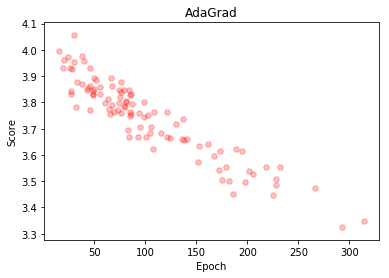

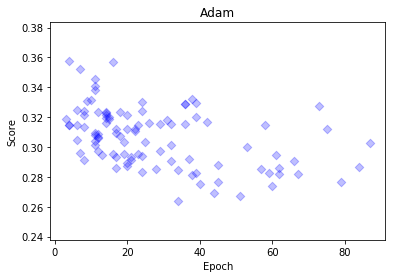

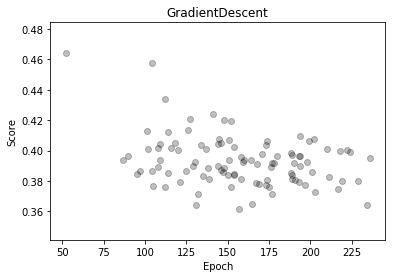

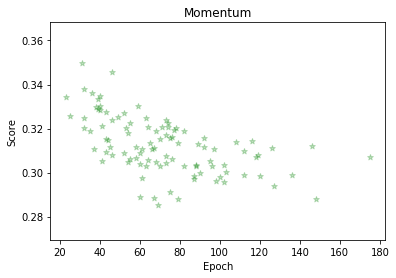

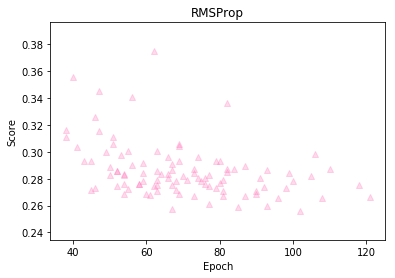

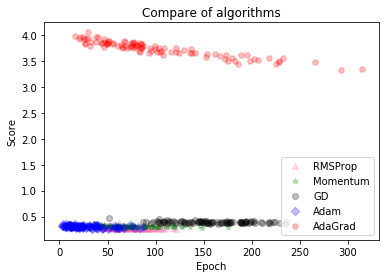

In [2]:
# Učitavanje potrebnih knjižica
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

adaGradScore = np.array([3.5377717, 3.756132, 3.8414092, 3.8784597, 3.6417015, 3.661017, 3.821608, 3.876443, 3.847351, 3.3264523, 3.8323412, 3.7991445, 3.6358564, 3.7055511, 3.4977775, 3.859666, 3.9544687, 3.8616483, 3.6630762, 3.7617521, 3.7159967, 3.6688054, 3.6699855, 3.974916, 3.6163132, 3.7645693, 3.813519, 3.4751654, 3.5078292, 3.833887, 3.5527003, 3.6817458, 3.848904, 3.6620307, 3.89151, 3.5973225, 3.8503785, 3.754792, 3.5442836, 3.6148014, 4.0552907, 3.4481683, 3.8438046, 3.5001688, 3.9728303, 3.6669586, 3.8460844, 3.957142, 3.9264672, 3.347025, 3.7439866, 3.8272998, 3.8613887, 3.8332818, 3.7933533, 3.5557163, 3.7825034, 3.7477803, 3.9299226, 3.9952826, 3.9611108, 3.931929, 3.8432927, 3.5717077, 3.8013017, 3.4866416, 3.7633555, 3.8945498, 3.753362, 3.832951, 3.8551571, 3.7731586, 3.7697284, 3.797567, 3.787612, 3.8271832, 3.6563716, 3.7837474, 3.8455033, 3.7596128, 3.7613502, 3.884901, 3.7917995, 3.5050282, 3.6216574, 3.76245, 3.621797, 3.681921, 3.8025255, 3.5522943, 3.7051463, 3.7696464, 3.932058, 3.6936774, 3.4495292, 3.6672595, 3.5272775, 3.804337, 3.7350004, 3.871881])
adaGradEpoch = np.array([202, 86, 76, 33, 162, 141, 75, 76, 74, 293, 86, 74, 153, 106, 198, 56, 30, 68, 124, 121, 130, 121, 84, 38, 195, 85, 64, 266, 228, 27, 232, 105, 79, 136, 67, 167, 50, 66, 172, 173, 30, 225, 49, 182, 25, 93, 43, 40, 28, 314, 99, 49, 46, 56, 87, 218, 80, 85, 26, 16, 21, 20, 27, 152, 99, 228, 70, 50, 103, 49, 44, 65, 46, 61, 79, 85, 138, 32, 84, 94, 76, 52, 68, 175, 108, 109, 189, 116, 81, 179, 95, 73, 46, 83, 186, 101, 206, 81, 137, 38])

adamScore = np.array([0.32417157, 0.3236075, 0.31669715, 0.3234331, 0.3383628, 0.29094124, 0.2824574, 0.31537795, 0.3203576, 0.2863951, 0.30760592, 0.31439754, 0.31100094, 0.33154863, 0.29488206, 0.28510925, 0.2847425, 0.3036325, 0.35686594, 0.28584424, 0.35734564, 0.3026612, 0.2639545, 0.26700133, 0.3274023, 0.3079812, 0.31784797, 0.31448033, 0.31973773, 0.31328967, 0.3406593, 0.31198546, 0.2892943, 0.3033445, 0.3044309, 0.28795218, 0.3198657, 0.32269683, 0.30936855, 0.29700914, 0.32982007, 0.28271067, 0.29334688, 0.318613, 0.28108695, 0.29616547, 0.32502204, 0.3452332, 0.31639066, 0.30432656, 0.31218317, 0.29502794, 0.31452253, 0.35201618, 0.31210953, 0.32392386, 0.30951715, 0.32851955, 0.2856663, 0.27621236, 0.31520292, 0.28347623, 0.32140395, 0.29196933, 0.31453755, 0.2851151, 0.29347444, 0.30649784, 0.30142558, 0.2956203, 0.31236213, 0.31517443, 0.2816837, 0.33098647, 0.2874186, 0.29140204, 0.2943058, 0.33242828, 0.27634895, 0.30605254, 0.321146, 0.29049993, 0.28172693, 0.3212033, 0.31476814, 0.2972718, 0.27551717, 0.32316273, 0.32977644, 0.27361116, 0.3159537, 0.30150175, 0.30879086, 0.293877, 0.29113445, 0.31858087, 0.26887345, 0.32885072, 0.2955004, 0.2999737])
adamEpoch = np.array([8, 18, 42, 12, 11, 32, 39, 36, 15, 84, 18, 58, 22, 10, 13, 57, 34, 25, 16, 17, 4, 87, 34, 51, 73, 11, 31, 4, 14, 8, 11, 17, 20, 19, 6, 45, 39, 14, 17, 12, 24, 59, 17, 15, 38, 7, 6, 11, 26, 11, 20, 19, 4, 7, 75, 24, 11, 36, 62, 45, 29, 24, 14, 37, 6, 28, 21, 12, 11, 23, 22, 32, 67, 9, 20, 8, 61, 38, 79, 12, 8, 66, 62, 20, 23, 29, 40, 14, 39, 60, 14, 32, 12, 24, 21, 3, 44, 36, 16, 53])

gdScore = np.array([0.40343145, 0.3995014, 0.39679018, 0.37810802, 0.39395294, 0.39245, 0.4061372, 0.39538097, 0.385495, 0.40732184, 0.39901033, 0.39628386, 0.3935729, 0.40403333, 0.38848144, 0.39349768, 0.4640165, 0.38744423, 0.37974608, 0.3925574, 0.4050962, 0.39611825, 0.36157897, 0.37148148, 0.4006966, 0.3867069, 0.38846645, 0.3855416, 0.38297537, 0.36482897, 0.43375546, 0.3807426, 0.40070337, 0.37644392, 0.38361964, 0.3909691, 0.3861461, 0.38682568, 0.3791259, 0.39386222, 0.39573652, 0.38411364, 0.38425323, 0.38140243, 0.36409345, 0.38644892, 0.3918298, 0.38952842, 0.3921998, 0.39776242, 0.40449804, 0.37746486, 0.38892013, 0.40174055, 0.40954676, 0.40754405, 0.41206548, 0.40640643, 0.4047953, 0.3728906, 0.40148073, 0.3642799, 0.3826057, 0.37580577, 0.40339816, 0.38950244, 0.42415756, 0.40235814, 0.39622387, 0.39360327, 0.38017684, 0.4007698, 0.37753853, 0.3892596, 0.37608308, 0.45759633, 0.39648575, 0.40029955, 0.3803772, 0.3918096, 0.4068011, 0.41986558, 0.3841825, 0.38125318, 0.38147402, 0.39818507, 0.4134346, 0.37878206, 0.41287625, 0.3744243, 0.37956893, 0.40049177, 0.3916857, 0.37142944, 0.37624437, 0.38583326, 0.4208939, 0.4191676, 0.3898088, 0.3845271])
gdEpoch = np.array([134, 218, 189, 169, 151, 130, 199, 236, 188, 202, 224, 193, 109, 144, 138, 87, 52, 146, 229, 159, 118, 180, 157, 132, 137, 97, 148, 114, 135, 165, 112, 191, 102, 105, 189, 168, 201, 104, 121, 164, 158, 150, 154, 158, 131, 125, 190, 194, 198, 171, 109, 197, 108, 108, 194, 145, 114, 174, 146, 203, 116, 234, 211, 175, 173, 144, 141, 154, 194, 160, 219, 210, 173, 176, 112, 104, 90, 222, 174, 178, 151, 148, 154, 189, 139, 188, 126, 167, 101, 217, 193, 120, 177, 177, 152, 147, 127, 152, 129, 95])

momentumScore = np.array([0.30512246, 0.32050124, 0.3118204, 0.29860216, 0.32846767, 0.32377097, 0.3194519, 0.3188375, 0.32737195, 0.31416526, 0.31376815, 0.3155915, 0.31906888, 0.33468908, 0.2989422, 0.31819388, 0.3157418, 0.32492107, 0.30315226, 0.29696575, 0.32993317, 0.31338236, 0.28853416, 0.28785837, 0.32536113, 0.31178012, 0.29905328, 0.3069888, 0.31141117, 0.29798573, 0.3457167, 0.30721506, 0.3062942, 0.30499995, 0.30335963, 0.3079729, 0.30322728, 0.31084374, 0.30906832, 0.31301147, 0.31630963, 0.32588533, 0.30555665, 0.3049158, 0.28510648, 0.30788434, 0.33427083, 0.31363034, 0.31127074, 0.3030068, 0.32236198, 0.30453047, 0.3063938, 0.32014114, 0.34994724, 0.31897938, 0.31081125, 0.32688922, 0.32065347, 0.30915087, 0.33021173, 0.29745802, 0.3086957, 0.31498563, 0.30749908, 0.32109466, 0.31107074, 0.32902798, 0.32404593, 0.32046407, 0.29861194, 0.33787188, 0.2940089, 0.30977818, 0.3051475, 0.3120023, 0.3107265, 0.33036223, 0.29562786, 0.3249199, 0.32086077, 0.3154661, 0.300126, 0.30632794, 0.30394226, 0.3227191, 0.28800896, 0.3031807, 0.33319303, 0.28889045, 0.30301628, 0.3150718, 0.3172033, 0.29630026, 0.2998042, 0.32010755, 0.2913881, 0.3362923, 0.3105656, 0.3028073])
momentumEpoch = np.array([95, 64, 92, 87, 40, 46, 77, 68, 43, 116, 108, 75, 35, 40, 112, 54, 92, 63, 82, 87, 38, 65, 67, 79, 49, 45, 136, 175, 58, 100, 46, 118, 55, 68, 102, 119, 88, 37, 60, 89, 76, 25, 64, 54, 69, 46, 23, 79, 67, 96, 55, 73, 58, 53, 31, 82, 97, 52, 71, 43, 59, 61, 52, 44, 73, 41, 126, 39, 73, 78, 120, 32, 127, 112, 41, 146, 66, 40, 102, 32, 74, 70, 103, 76, 60, 74, 148, 70, 39, 60, 63, 43, 73, 98, 90, 32, 75, 36, 61, 88])

rmsScore = np.array([0.29006058, 0.28402218, 0.29099333, 0.283063, 0.30094597, 0.31597307, 0.28332794, 0.28437674, 0.28395766, 0.30384588, 0.28691795, 0.276377, 0.2808033, 0.27902743, 0.2672417, 0.28558615, 0.26566648, 0.27892727, 0.26648408, 0.28889012, 0.31122875, 0.28696412, 0.26855147, 0.2833428, 0.29345244, 0.27514333, 0.2713269, 0.28643894, 0.27636904, 0.27477035, 0.32560757, 0.27501276, 0.3043946, 0.2783086, 0.31523508, 0.2875137, 0.26740754, 0.2556993, 0.29588255, 0.28068423, 0.3005326, 0.27071145, 0.27468303, 0.2757961, 0.2589961, 0.27337775, 0.28602526, 0.27886572, 0.2755192, 0.26529616, 0.2837832, 0.27461398, 0.27821484, 0.2997016, 0.28743976, 0.28462982, 0.29634243, 0.28239188, 0.34044176, 0.27146813, 0.2917923, 0.2784095, 0.27055234, 0.26745185, 0.2688616, 0.3059669, 0.2770882, 0.2830725, 0.29811418, 0.28193155, 0.31134114, 0.27861995, 0.2575153, 0.29746437, 0.25985563, 0.3453521, 0.28055847, 0.3560163, 0.3752023, 0.28920022, 0.286063, 0.293109, 0.27619183, 0.28042608, 0.26896238, 0.2734545, 0.26086065, 0.28649902, 0.3061967, 0.28311342, 0.2707301, 0.29284564, 0.29340476, 0.29328632, 0.27273682, 0.2737857, 0.26837555, 0.3360302, 0.26765367, 0.27243727])
rmsEpoch = np.array([56, 59, 67, 50, 63, 38, 64, 73, 99, 41, 73, 58, 74, 81, 81, 52, 108, 63, 121, 50, 38, 82, 90, 66, 80, 63, 68, 67, 58, 52, 46, 118, 69, 68, 47, 84, 87, 102, 66, 91, 55, 81, 62, 54, 85, 46, 52, 71, 67, 96, 54, 77, 59, 49, 110, 82, 74, 105, 56, 45, 59, 75, 90, 73, 69, 69, 80, 77, 106, 70, 51, 100, 67, 53, 93, 47, 66, 40, 62, 87, 63, 79, 76, 76, 60, 98, 77, 93, 51, 54, 63, 43, 45, 69, 79, 92, 54, 82, 61, 55])

# Plot AdaGrad
f = plt.figure("AdaGrad")
plt.title("AdaGrad")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(adaGradEpoch,adaGradScore, c='r', alpha = 0.25, marker="H")
plt.show()

# Plot Adam
f = plt.figure("Adam")
plt.title("Adam")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(adamEpoch,adamScore, c='b', alpha = 0.25, marker="D")
plt.show()


# Plot Gradient Descent
f = plt.figure("GradientDescent")
plt.title("GradientDescent")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(gdEpoch,gdScore, c='black', alpha = 0.25, marker="o")
plt.show()

# Plot Momentum
f = plt.figure("Momentum")
plt.title("Momentum")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(momentumEpoch,momentumScore, c='green', alpha = 0.25, marker="*")
plt.show()

# Plot RMSProp
f = plt.figure("RMSProp")
plt.title("RMSProp")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(rmsEpoch,rmsScore, c='hotpink', alpha = 0.25, marker="^")
plt.show()

#Plot
plt.title("Compare of algorithms")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.scatter(rmsEpoch,rmsScore, c='hotpink', alpha = 0.25, marker="^", label="RMSProp")
plt.scatter(momentumEpoch,momentumScore, c='green', alpha = 0.25, marker="*", label="Momentum")
plt.scatter(gdEpoch,gdScore, c='black', alpha = 0.25, marker="o", label = "GD")
plt.scatter(adamEpoch,adamScore, c='b', alpha = 0.25, marker="D", label = "Adam")
plt.scatter(adaGradEpoch,adaGradScore, c='r', alpha = 0.25, marker="H", label = "AdaGrad")
plt.legend(loc='lower right')
plt.show()

